# Waypoint surveying with behaviour trees

In [1]:
import pygmo as pg, numpy as np, sys; sys.path.append("../src/")

# Farm environment

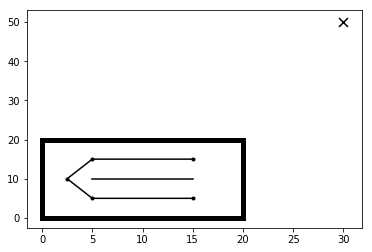

In [2]:
from farm import Farm

# padding between walls and farm border
dx, dy = 5, 10

# wall seperation
dw = 10

# wall length
lx = 10

# number of walls
N = 1

# dock coordinates
dsx, dsy = 30, 50

# instantiate farm
farm = Farm(dx, dy, dw, lx, N, dsx, dsy)

# compute sequenced coverage way points
waypoints = farm.simple_coverage()

# visualise
farm.plot()

## Dynamics
$
\dot{\boldsymbol{s}} =
\left[\begin{matrix}v_{x} & v_{y} & \frac{T u_{x}}{m} u_{t} & \frac{T u_{y}}{m} u_{t}\end{matrix}\right] ^\intercal
$

In [3]:
from dynamics import Dynamics

# maximum thrust [N]
thrust = 5

# mass [kg]
mass = 25

# instantiate AUV
AUV = Dynamics(thrust, mass)
AUV.alpha = 0

## Segment

In [ ]:
from segment import Indirect

# instantiate indirect segment
seg = Indirect(AUV)

# duration bounds
Tlb, Tub = 1, 500

# waypoints velocity constraints
vlb, vub = 0, 0

# initial state bounds
p0 = [farm.dsx, farm.dsy]
s0lb = [*p0, 0, 0]
s0ub = [*p0, 0, 0]

# initial state bounds
pf = waypoints[0]
sflb = [*pf, vlb, vlb]
sfub = [*pf, vub, vub]

# set segment bounds
seg.set_bounds(Tlb, Tub, s0lb, s0ub, sflb, sfub)

# solve
#seg.solve(otol=1e-5)

## Trajectory

In [ ]:
from trajectory import Indirect

# inirect trajectory
traj = Indirect(AUV)

# assemble bounds
slb = np.hstack((waypoints, np.full((len(waypoints), 2), vlb)))
sub = np.hstack((waypoints, np.full((len(waypoints), 2), vub)))
Tlb, Tub = 1, 1000

# set trajectory
traj.set_bounds(Tlb, Tub, slb, sub)

# solve
traj.solve()

In [ ]:
import matplotlib.pyplot as plt
traj.times